### Configuration

In [5]:
import numpy as np
from utils import *

### Minimum degree reordering 

In [6]:
def minimum_degree_transformation(input_matrix: np.ndarray) -> np.ndarray:
    E = list(zip(*np.nonzero(input_matrix)))
    graph = [{i} for i in range(input_matrix.shape[0])]
    for e in E:
        graph[e[0]].add(e[1])
        graph[e[1]].add(e[0])

    order = []
    for _ in range(len(graph)):
        v = -1
        min_deg = len(input_matrix)

        for j, s in enumerate(graph):
            if len(s) != 0 and len(s) < min_deg:
                v = j
                min_deg = len(s)

        order.append(v)
        for s in graph:
            if v in s:
                s.remove(v)
        graph[v].clear()

    inverted = [None for _ in range(len(order))]
    for i, o in enumerate(order):
        inverted[o] = i

    result = np.zeros(input_matrix.shape)
    for coord in E:
        result[inverted[coord[0]]][inverted[coord[1]]] = input_matrix[coord]

    return result

### Benchmarks

In [7]:
def compress(A, r, eps) -> TreeNode:
    return create_tree(A, -1, A.shape[0], 0, A.shape[1], r, eps)

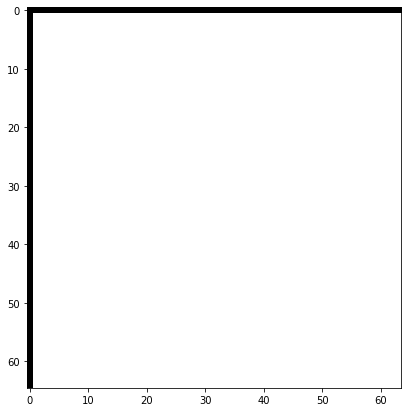

In [8]:
A = generate_matrix(64, 64, 0.5)

node = compress(A, 1, 0.1)

draw_tree(node)

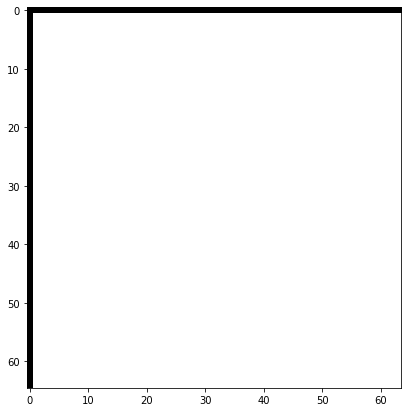

In [5]:
B = minimum_degree_transformation(A)

node2 = compress(B, 1, 0.1)

draw_tree(node2)